In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
df = pd.read_csv("Social_Network_Ads.csv")

In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [25]:
df.shape

(400, 5)

In [26]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## EDA Analysis

### 1. Univariate Analysis

<AxesSubplot:>

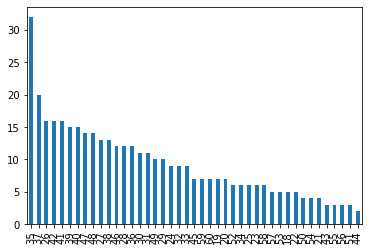

In [27]:
df['Age'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Density'>

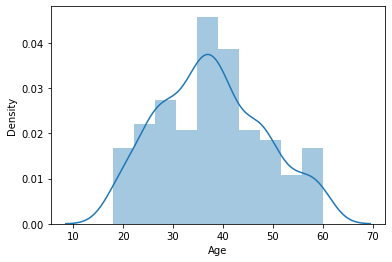

In [28]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

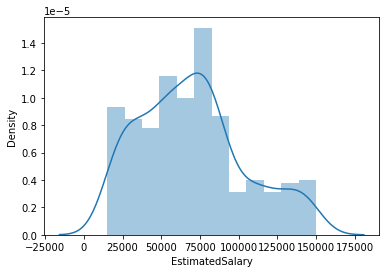

In [31]:
sns.distplot(df["EstimatedSalary"])

### 2. Bivariate or Multivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

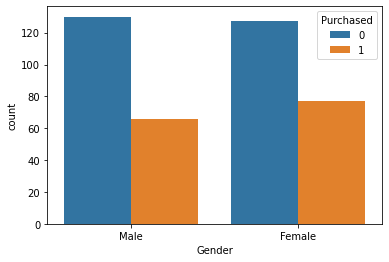

In [32]:
sns.countplot(x=df['Gender'], hue=df['Purchased'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

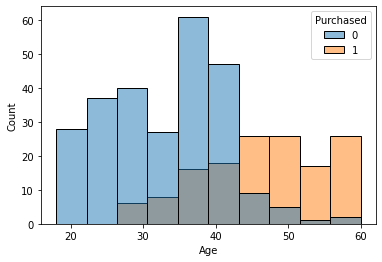

In [33]:
sns.histplot(x=df['Age'], hue=df['Purchased'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

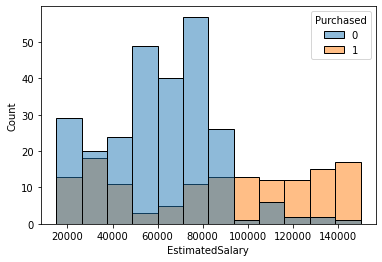

In [34]:
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

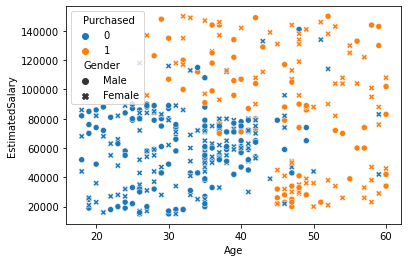

In [35]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', style='Gender')

<AxesSubplot:>

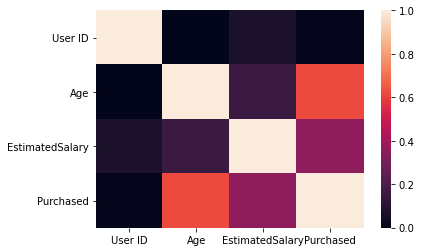

In [36]:
sns.heatmap(df.corr())

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['Gender','Age', 'EstimatedSalary']], df.iloc[:,-1])

In [39]:
x_train

,Gender,Age,EstimatedSalary
88,Male,26,81000
244,Female,41,72000
384,Female,57,33000
220,Female,41,80000
111,Female,37,71000
...,...,...,...
33,Female,28,44000
83,Male,35,88000
393,Male,60,42000
156,Male,46,59000


In [40]:
x_test

,Gender,Age,EstimatedSalary
92,Male,26,15000
279,Female,50,36000
99,Female,28,37000
290,Male,39,134000
23,Female,45,22000
...,...,...,...
344,Male,47,105000
192,Male,29,43000
138,Female,28,59000
303,Male,37,79000


In [42]:
print(y_train, y_test)

88     0
244    0
384    1
220    0
111    0
      ..
33     0
83     0
393    1
156    0
229    1
Name: Purchased, Length: 300, dtype: int64 92     0
279    1
99     0
290    1
23     1
      ..
344    1
192    0
138    0
303    1
53     0
Name: Purchased, Length: 100, dtype: int64


## Encoding Gender Column

## 

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
lr = LabelEncoder()
     

In [48]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [49]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [50]:
df['Gender'].unique()

array([1, 0])

## Feature Scaling Using Standard Scaler

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
df.loc[:,['Age', 'EstimatedSalary']]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [54]:
df.loc[:,['Age', 'EstimatedSalary']] = sc.fit_transform(df.loc[:,['Age', 'EstimatedSalary']].values)

In [55]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.781797,-1.490046,0
1,15810944,1,-0.253587,-1.460681,0
2,15668575,0,-1.113206,-0.785290,0
3,15603246,0,-1.017692,-0.374182,0
4,15804002,1,-1.781797,0.183751,0


## Model Training

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [61]:
lr.fit(x_test, y_test)

ValueError: could not convert string to float: 'Male'

In [59]:
lr.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.